In [20]:
! pip install -r requirements.txt

  Obtaining dependency information for scikeras==0.13.0 from https://files.pythonhosted.org/packages/ea/09/1c02aa24daf7a003c06f629fbb69dc9ae1bda1b247d7b8981e550d752ac9/scikeras-0.13.0-py3-none-any.whl.metadata
  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
  Obtaining dependency information for numpy==1.26.4 from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Obtaining dependency information for tensorflow==2.15.0 from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1

ERROR: Cannot install -r requirements.txt (line 2), keras==3.2.1 and tensorflow because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [100]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

def dataset(file_name:str = '', dataset:str = 'kdd'):
  return f'dataset/{dataset}/{file_name}'

In [101]:
import os

print(os.listdir(dataset()))

['corrected.gz', 'dataset_nsl.csv', 'kddcup.data.gz', 'kddcup.data_10_percent.gz', 'kddcup.names', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent.gz', 'test_dataset_nsl.csv', 'training_attack_types', 'typo-correction.txt']


In [103]:
with open(dataset("kddcup.names"),'r') as f:
  names = f.read()
  features = [name.split(':')[0].strip() for name in names.split('.')][1:-1] + ['target']

len(features) , features

(42,
 ['duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_root',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'num_outbound_cmds',
  'is_host_login',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_srv_rate',
  'diff_srv_rate',
  'srv_diff_host_rate',
  'dst_host_count',
  'dst_host_srv_count',
  'dst_host_same_srv_rate',
  'dst_host_diff_srv_rate',
  'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate',
  'dst_host_serror_rate',
  'dst_host_srv_serror_rate',
  'dst_host_rerror_rate',
  'dst_host_srv_rerror_rate',
  'target'])

In [102]:
attack_types = {'normal': 'normal'}
with open(dataset("training_attack_types"),'r') as f:
  types = f.read()
  attack_types.update({t.split(' ')[0]: t.split(' ')[1] for t in types.split('\n')[:-2]})
len(attack_types), attack_types

(23,
 {'normal': 'normal',
  'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l'})

## KDD

In [5]:
import pandas as pd

df = pd.read_csv(dataset('kddcup.data.gz'),names=features)

df['benign'] = df.target.apply(lambda r: 1 if (r[:-1]=='normal') else 0)
df['Attack Type'] = df.target.apply(lambda r:attack_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,1,normal


## NSL

In [104]:
feature_list = ['duration', 'protocol_type' , 'service'  , 'flag' , \
                'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', \
                'urgent', 'hot', 'num_failed_logins', 'logged_in', \
                'num_compromised', 'root_shell', 'su_attempted', \
                'num_root', 'num_file_creations', 'num_shells', \
                'num_access_files', 'num_outbound_cmds', 'is_host_login', \
                'is_guest_login', 'count', 'srv_count', 'serror_rate', \
                'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', \
                'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', \
                'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', \
                'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', \
                'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', \
                'dst_host_srv_serror_rate', 'dst_host_rerror_rate', \
                'dst_host_srv_rerror_rate', 'class', 'difficulty']


df = pd.read_csv(dataset('KDDTrain+.txt', 'nsl'), names=feature_list, index_col=False)


df.rename(columns={'class': 'target'}, inplace=True)  # by name
df['benign'] = df.target.apply(lambda r: 1 if (r=='normal') else 0)
df['Attack Type'] = df.target.apply(lambda r:attack_types[r])
df = df.drop(columns=['difficulty'])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,1,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,0,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1,normal


# Visualize Dataset

In [ ]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

In [ ]:
print(df['target'].value_counts())
bar_graph('target')

In [ ]:
print(df['Attack Type'].value_counts())
bar_graph('Attack Type')

In [ ]:
df.isnull().sum()

In [ ]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

In [ ]:
bar_graph('protocol_type')

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

In [ ]:
bar_graph('flag')

In [ ]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

In [ ]:
len(df.columns)

# Data Cleaning

In [105]:
df = df.dropna(axis='columns')# drop columns with NaN

In [106]:
{col:df[col].nunique() for col in df}

{'duration': 2981,
 'protocol_type': 3,
 'service': 70,
 'flag': 11,
 'src_bytes': 3341,
 'dst_bytes': 9326,
 'land': 2,
 'wrong_fragment': 3,
 'urgent': 4,
 'hot': 28,
 'num_failed_logins': 6,
 'logged_in': 2,
 'num_compromised': 88,
 'root_shell': 2,
 'su_attempted': 3,
 'num_root': 82,
 'num_file_creations': 35,
 'num_shells': 3,
 'num_access_files': 10,
 'num_outbound_cmds': 1,
 'is_host_login': 2,
 'is_guest_login': 2,
 'count': 512,
 'srv_count': 509,
 'serror_rate': 89,
 'srv_serror_rate': 86,
 'rerror_rate': 82,
 'srv_rerror_rate': 62,
 'same_srv_rate': 101,
 'diff_srv_rate': 95,
 'srv_diff_host_rate': 60,
 'dst_host_count': 256,
 'dst_host_srv_count': 256,
 'dst_host_same_srv_rate': 101,
 'dst_host_diff_srv_rate': 101,
 'dst_host_same_src_port_rate': 101,
 'dst_host_srv_diff_host_rate': 75,
 'dst_host_serror_rate': 101,
 'dst_host_srv_serror_rate': 100,
 'dst_host_rerror_rate': 101,
 'dst_host_srv_rerror_rate': 101,
 'target': 23,
 'benign': 2,
 'Attack Type': 5}

## KDD

In [59]:
test_df = pd.read_csv(dataset('corrected.gz'),names=features)

## NSL

In [151]:
test_df = pd.read_csv(dataset('KDDTest+.txt', 'nsl'), names=feature_list, index_col=False)


test_df.rename(columns={'class': 'target'}, inplace=True)  # by name
test_df = test_df.drop(columns=['difficulty'])
test_df.shape

(22544, 42)

------------------------------------

In [108]:
print("Number of duplicate records:", df.duplicated().sum())
df = df.drop_duplicates()
df.shape

Number of duplicate records: 0


(125973, 44)

In [109]:
print("Number of duplicate records:", test_df.duplicated().sum())
test_df = test_df.drop_duplicates()
test_df.shape

Number of duplicate records: 0


(22544, 42)

In [110]:
df = df[[col for col in df if df[col].nunique() > 1]]

In [66]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,0,dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,1,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,1,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,0,dos
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,1,normal


In [111]:
set(test_df.target) - set(df.target)

{'apache2',
 'httptunnel',
 'mailbomb',
 'mscan',
 'named',
 'processtable',
 'ps',
 'saint',
 'sendmail',
 'snmpgetattack',
 'snmpguess',
 'sqlattack',
 'udpstorm',
 'worm',
 'xlock',
 'xsnoop',
 'xterm'}

In [112]:
attack_types['apache2'] = 'dos'
attack_types['mailbomb'] = 'dos'
attack_types['processtable'] = 'dos'
attack_types['udpstorm'] = 'dos'
attack_types['named'] = 'r2l'
attack_types['sendmail'] = 'r2l'
attack_types['snmpgetattack'] = 'r2l'
attack_types['snmpguess'] = 'r2l'
attack_types['worm'] = 'r2l'
attack_types['xsnoop'] = 'r2l'
attack_types['xlock'] = 'r2l'
attack_types['httptunnel'] = 'u2r'
attack_types['xterm'] = 'u2r'
attack_types['sqlattack'] = 'u2r'
attack_types['ps'] = 'u2r'
attack_types['saint'] = 'probe'
attack_types['mscan'] = 'probe'

## KDD

In [15]:
test_df['benign'] = test_df.target.apply(lambda r: 1 if (r[:-1]=='normal') else 0)
test_df['Attack Type'] = test_df.target.apply(lambda r:attack_types[r[:-1]])

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,udp,private,SF,105,146,0,0,0,0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,1,normal
3,0,udp,private,SF,105,146,0,0,0,0,...,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,0,r2l
4,0,udp,private,SF,105,146,0,0,0,0,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,0,r2l
5,0,udp,private,SF,105,146,0,0,0,0,...,0.00,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,0,r2l
6,0,udp,domain_u,SF,29,0,0,0,0,0,...,0.30,0.30,0.0,0.0,0.0,0.0,0.0,normal.,1,normal


## NSL

In [114]:
test_df['benign'] = test_df.target.apply(lambda r: 1 if (r=='normal') else 0)
test_df['Attack Type'] = test_df.target.apply(lambda r:attack_types[r])

---

In [115]:
test_df = test_df[df.columns]
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,0,dos
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,0,dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,1,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,0,probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,0,probe


In [116]:
from sklearn.preprocessing import LabelEncoder

combined_df = pd.concat([df, test_df], ignore_index=True)

label_encoders = {}

string_categorical_columns = ['Attack Type', 'protocol_type', 'flag', 'service', 'target']
for column in string_categorical_columns:
	label_encoders[column] = LabelEncoder()
	combined_df[column] = label_encoders[column].fit_transform(combined_df[column])
	print(column, label_encoders[column].classes_)

df = combined_df.iloc[:len(df)]
test_df = combined_df.iloc[len(df):]

df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

del combined_df

Attack Type ['dos' 'normal' 'probe' 'r2l' 'u2r']
protocol_type ['icmp' 'tcp' 'udp']
flag ['OTH' 'REJ' 'RSTO' 'RSTOS0' 'RSTR' 'S0' 'S1' 'S2' 'S3' 'SF' 'SH']
service ['IRC' 'X11' 'Z39_50' 'aol' 'auth' 'bgp' 'courier' 'csnet_ns' 'ctf'
 'daytime' 'discard' 'domain' 'domain_u' 'echo' 'eco_i' 'ecr_i' 'efs'
 'exec' 'finger' 'ftp' 'ftp_data' 'gopher' 'harvest' 'hostnames' 'http'
 'http_2784' 'http_443' 'http_8001' 'imap4' 'iso_tsap' 'klogin' 'kshell'
 'ldap' 'link' 'login' 'mtp' 'name' 'netbios_dgm' 'netbios_ns'
 'netbios_ssn' 'netstat' 'nnsp' 'nntp' 'ntp_u' 'other' 'pm_dump' 'pop_2'
 'pop_3' 'printer' 'private' 'red_i' 'remote_job' 'rje' 'shell' 'smtp'
 'sql_net' 'ssh' 'sunrpc' 'supdup' 'systat' 'telnet' 'tftp_u' 'tim_i'
 'time' 'urh_i' 'urp_i' 'uucp' 'uucp_path' 'vmnet' 'whois']
target ['apache2' 'back' 'buffer_overflow' 'ftp_write' 'guess_passwd'
 'httptunnel' 'imap' 'ipsweep' 'land' 'loadmodule' 'mailbomb' 'mscan'
 'multihop' 'named' 'neptune' 'nmap' 'normal' 'perl' 'phf' 'pod'
 'portsweep

In [74]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,1,20,9,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,16,1,1
1,0,2,44,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,16,1,1
2,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,14,0,0
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,16,1,1
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16,1,1


# Corr

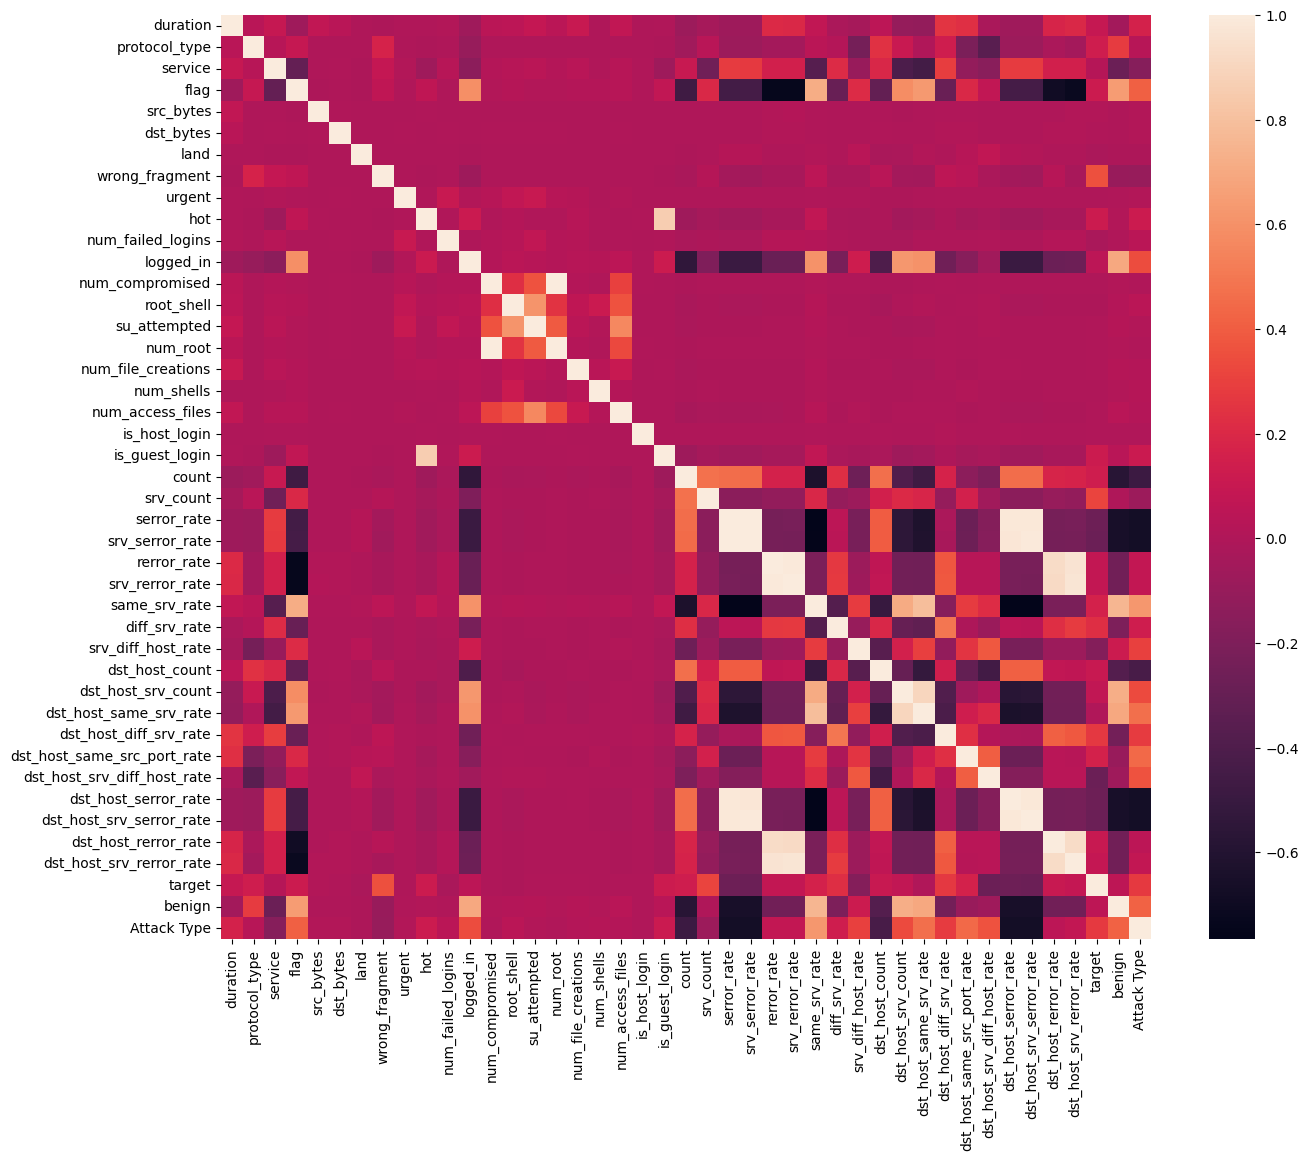

In [117]:
corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()


In [ ]:
corr['target']

In [76]:
label_cols = ['target', 'Attack Type', 'benign']

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
np.fill_diagonal(mask, True)
corr_matrix = corr.mask(mask)

threshold = 0.95

# Find features with correlation above the threshold
high_corr_features = ((corr_matrix.abs() > threshold) & (corr_matrix != 1)).any()

# Identify and remove redundant features
to_drop = high_corr_features[high_corr_features].index
to_drop = to_drop.drop(label_cols, errors='ignore')
# Drop the redundant features from the DataFrame
df = df.drop(columns=to_drop)
test_df = test_df.drop(columns=to_drop)
len(to_drop), to_drop

(6,
 Index(['num_compromised', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
        'srv_rerror_rate', 'dst_host_serror_rate'],
       dtype='object'))

In [ ]:
# print(df.shape)

# for f,value in corr[label_col].items():
#   if abs(value) > 0.6 and f!=label_col:
#     df.drop(f,axis = 1, inplace=True)
#     print('dropped', f)
# df.shape

In [ ]:
df['service'].corr(df[label_cols[0]])

In [ ]:
df.head()

In [77]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

is_host_login                  2.817483e-03
land                           1.408607e-02
urgent                         1.436603e-02
num_shells                     2.218113e-02
root_shell                     3.660284e-02
su_attempted                   4.515438e-02
num_failed_logins              4.523914e-02
is_guest_login                 9.661233e-02
num_access_files               9.936956e-02
dst_host_srv_diff_host_rate    1.125638e-01
diff_srv_rate                  1.803144e-01
dst_host_diff_srv_rate         1.889218e-01
wrong_fragment                 2.535300e-01
srv_diff_host_rate             2.598305e-01
dst_host_rerror_rate           3.065575e-01
dst_host_same_src_port_rate    3.089971e-01
dst_host_srv_rerror_rate       3.194594e-01
protocol_type                  4.266196e-01
same_srv_rate                  4.396229e-01
dst_host_srv_serror_rate       4.456691e-01
dst_host_same_srv_rate         4.489494e-01
num_file_creations             4.839351e-01
logged_in                      4

In [118]:
df.to_csv(dataset('dataset_nsl.csv', 'csvs'), index=False)
test_df.to_csv(dataset('test_dataset_nsl.csv', 'csvs'), index=False)

# Load data

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

def dataset(file_name:str = '', dataset:str = 'kdd'):
  return f'dataset/{dataset}/{file_name}'

In [6]:
df = pd.read_csv(dataset('dataset_nsl.csv', 'csvs'))
test_df = pd.read_csv(dataset('test_dataset_nsl.csv', 'csvs'))
df.shape, test_df.shape

((125973, 43), (22544, 43))

In [7]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,benign,Attack Type
0,0,1,49,1,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,14,0,0
1,0,1,49,1,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,14,0,0
2,2,1,20,9,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,16,1,1
3,0,0,14,9,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,24,0,2
4,1,1,60,2,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,11,0,2


In [ ]:
df.head()

In [8]:
df = df.drop(['Attack Type','target'], axis=1)
test_df = test_df.drop(['Attack Type','target'], axis=1)

In [9]:
label_col = 'benign'
# Y = df[[label_col]]
# X = df.drop([label_col], axis=1)
Y_train = df[[label_col]]
X_train = df.drop([label_col], axis=1)
df = df.drop([label_col], axis=1)

In [10]:
Y_test = test_df[[label_col]]
X_test = test_df.drop([label_col], axis=1)
test_df = test_df.drop([label_col], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=273, shuffle=True)
print('Train', X_train.shape, Y_train.shape)
print('Validation', X_val.shape, Y_val.shape)
print('Test', X_test.shape, Y_test.shape)

Train (113375, 40) (113375, 1)
Validation (12598, 40) (12598, 1)
Test (22544, 40) (22544, 1)


In [31]:
from keras.utils import to_categorical

Y_train_one_hot = to_categorical(Y_train, num_classes=2)
Y_val_one_hot = to_categorical(Y_val, num_classes=2)
Y_test_one_hot = to_categorical(Y_test, num_classes=2)

In [17]:
from sklearn.metrics import classification_report

def fit(model):
  name = type(model).__name__
  start_time = time.time()
  model.fit(X_train, Y_train.values.ravel())
  end_time = time.time()
  print(f"{name}: Training time: ",end_time-start_time)

def fit_evaluate(model):
  name = type(model).__name__
  fit(model)

  start_time = time.time()
  Y_test_pred = model.predict(X_test)
  end_time = time.time()
  print(f"{name}: Testing time: ",end_time-start_time)

  print(f"{name}: Train score is:", model.score(X_train, Y_train))
  print(f"{name}: Validation score is:", model.score(X_val,Y_val))
  print(f"{name}: Test score is:", model.score(X_test,Y_test))

  print(classification_report(Y_test, Y_test_pred))


In [18]:
from sklearn.naive_bayes import GaussianNB
fit_evaluate(GaussianNB())

GaussianNB: Training time:  0.1024012565612793
GaussianNB: Testing time:  0.02669501304626465
GaussianNB: Train score is: 0.8970407938257994
GaussianNB: Validation score is: 0.8983171932052707
GaussianNB: Test score is: 0.7709811923349894
              precision    recall  f1-score   support

           0       0.92      0.66      0.77     12833
           1       0.67      0.92      0.78      9711

    accuracy                           0.77     22544
   macro avg       0.79      0.79      0.77     22544
weighted avg       0.81      0.77      0.77     22544



In [145]:
from sklearn.tree import DecisionTreeClassifier
fit_evaluate(DecisionTreeClassifier(criterion="entropy", max_depth = 6))

DecisionTreeClassifier: Training time:  0.20509934425354004
DecisionTreeClassifier: Testing time:  0.0020036697387695312
DecisionTreeClassifier: Train score is: 0.9768114663726571
DecisionTreeClassifier: Validation score is: 0.9769010954119701
DecisionTreeClassifier: Test score is: 0.7611337828246983
              precision    recall  f1-score   support

           0       0.96      0.61      0.74     12833
           1       0.65      0.97      0.78      9711

    accuracy                           0.76     22544
   macro avg       0.80      0.79      0.76     22544
weighted avg       0.83      0.76      0.76     22544



In [127]:
from sklearn.svm import SVC
fit_evaluate(SVC(gamma = 'scale'))

SVC: Training time:  51.548590660095215
SVC: Testing time:  6.037764072418213
SVC: Train score is: 0.9851642778390298
SVC: Validation score is: 0.9855532624226068
SVC: Test score is: 0.7802519517388219


In [128]:
from sklearn.linear_model import LogisticRegression
fit_evaluate(LogisticRegression(max_iter=1200000))

LogisticRegression: Training time:  0.22837209701538086
LogisticRegression: Testing time:  0.0
LogisticRegression: Train score is: 0.9538875413450937
LogisticRegression: Validation score is: 0.9576123194157803
LogisticRegression: Test score is: 0.7519517388218595


In [129]:
from sklearn.ensemble import GradientBoostingClassifier
fit_evaluate(GradientBoostingClassifier(random_state=220))

GradientBoostingClassifier: Training time:  11.980988502502441
GradientBoostingClassifier: Testing time:  0.017322540283203125
GradientBoostingClassifier: Train score is: 0.9921764057331863
GradientBoostingClassifier: Validation score is: 0.9929353865692967
GradientBoostingClassifier: Test score is: 0.7822924059616749


In [49]:
from sklearn.ensemble import RandomForestClassifier
fit_evaluate(RandomForestClassifier(n_estimators=100))

RandomForestClassifier: Training time:  10.64260983467102
RandomForestClassifier: Testing time:  0.17244648933410645
RandomForestClassifier: Train score is: 0.9998412348401323
RandomForestClassifier: Validation score is: 0.9982536910620733
RandomForestClassifier: Test score is: 0.7825141944641589
              precision    recall  f1-score   support

           0       0.97      0.64      0.77     12833
           1       0.67      0.97      0.79      9711

    accuracy                           0.78     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.78      0.78     22544



In [130]:
from sklearn.ensemble import AdaBoostClassifier
fit_evaluate(AdaBoostClassifier(random_state=387))

c:\Users\rezaab\Projects\IntrusionDetection-KDD\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier: Training time:  3.468942642211914
AdaBoostClassifier: Testing time:  0.07561397552490234
AdaBoostClassifier: Train score is: 0.9822800441014333
AdaBoostClassifier: Validation score is: 0.9829337990157168
AdaBoostClassifier: Test score is: 0.7567867281760113


# NN

In [30]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy
import gc
from keras.callbacks import EarlyStopping


keras.backend.clear_session()

try:
  del kerasModel
  gc.collect()
  del ann
  gc.collect()
except:
  pass

kerasModel = Sequential(
	[
		Input(shape=(X_train.shape[1],)),
		Dense(64, activation='relu', kernel_initializer='he_uniform'),
    	BatchNormalization(),
    	Dropout(0.5),
		Dense(32, activation='relu', kernel_initializer='he_uniform'),
    	BatchNormalization(),
    	Dropout(0.5),
		Dense(2, activation='softmax')
	]
)

kerasModel.compile(optimizer = 'adam', loss='categorical_crossentropy',metrics = ['accuracy'])

kerasModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,154 (20.13 KB)

 Trainable params: 4,962 (19.38 KB)

 Non-trainable params: 192 (768.00 B)

'few'

In [148]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.0001, 
    patience=10, 
    verbose=1, 
    mode='min', 
    restore_best_weights=True
)


start_time = time.time()
kerasModel.fit(X_train, Y_train_one_hot, 
               validation_data=(X_val, Y_val_one_hot), 
               epochs=10,
               batch_size=64, 
               callbacks=[early_stopping])
end_time = time.time()
print(f"ANN: Training time: ",end_time-start_time)

ann_train_pred = kerasModel.predict(X_train)
ann_val_pred = kerasModel.predict(X_val)
ann_test_pred = kerasModel.predict(X_test)

ann_train_pred_scalar = np.argmax(ann_train_pred, axis=1)
ann_val_pred_scalar = np.argmax(ann_val_pred, axis=1)
ann_test_pred_scalar = np.argmax(ann_test_pred, axis=1)

print('Train accuracy:', accuracy_score(Y_train,ann_train_pred_scalar))
print('Val accuracy:', accuracy_score(Y_val,ann_val_pred_scalar))
print('Test accuracy:', accuracy_score(Y_test,ann_test_pred_scalar))

print(classification_report(Y_test, ann_test_pred_scalar))

Epoch 1/10


1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 751us/step - accuracy: 0.9085 - loss: 0.2435 - val_accuracy: 0.9763 - val_loss: 0.0617
Epoch 2/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.9680 - loss: 0.0945 - val_accuracy: 0.9794 - val_loss: 0.0447
Epoch 3/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.9737 - loss: 0.0751 - val_accuracy: 0.9882 - val_loss: 0.0345
Epoch 4/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.9776 - loss: 0.0647 - val_accuracy: 0.9906 - val_loss: 0.0287
Epoch 5/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.9795 - loss: 0.0586 - val_accuracy: 0.9917 - val_loss: 0.0282
Epoch 6/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9825 - loss: 0.0531 - val_accuracy: 0.9925 - val_loss: 0.0263
Epoch 7/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.9825 - loss: 0.0506 - val_accuracy: 0.9917 - val_loss: 0.0253
Epoch 8/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.9837 - loss: 0.04

## Non-Symmetric Deep Auto-Encoder (NDAE)

In [50]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras.models import Model
from keras.layers import Dense, Input, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy
import gc
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping

keras.backend.clear_session()


In [37]:
Y_train_one_hot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [51]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001, 
    patience=5, 
    verbose=1, 
    mode='min', 
    restore_best_weights=False
)

input_layer1 = Input(shape=(X_train.shape[1],))
encoded1 = Dense(14, activation='sigmoid')(input_layer1)
encoded1 = Dense(28, activation='sigmoid')(encoded1)
encoded1 = Dense(28, activation='sigmoid')(encoded1)
output_layer1 = Dense(X_train.shape[1], activation='sigmoid')(encoded1)  # Output layer size same as input
# Decoder part to reconstruct the input

autoencoder1  = Model(inputs=input_layer1, outputs=output_layer1)
autoencoder1.compile(optimizer='adam', loss='mse')

autoencoder1.fit(X_train, X_train, epochs=200, batch_size=64, shuffle=True,validation_data=(X_val, X_val), 
               callbacks=[early_stopping])

encoder1  = Model(inputs=input_layer1, outputs=encoded1)

X_train_transformed1 = encoder1.predict(X_train)
X_test_transformed1 = encoder1.predict(X_test)
X_val_transformed1 = encoder1.predict(X_val)

Epoch 1/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0776 - val_loss: 0.0206
Epoch 2/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0181 - val_loss: 0.0127
Epoch 3/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0123 - val_loss: 0.0099
Epoch 4/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0094 - val_loss: 0.0069
Epoch 5/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0067 - val_loss: 0.0056
Epoch 6/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0054 - val_loss: 0.0042
Epoch 7/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 8/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 9/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 10/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 11/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 12/200
1772/1

In [52]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001, 
    patience=5, 
    verbose=1, 
    mode='min', 
    restore_best_weights=False
)

input_layer2 = Input(shape=(28,))
encoded2 = Dense(14, activation='sigmoid')(input_layer2)
encoded2 = Dense(28, activation='sigmoid')(encoded2)
encoded2 = Dense(28, activation='sigmoid')(encoded2)
output_layer2 = Dense(28, activation='sigmoid')(encoded2)  # Output layer size same as input

autoencoder2  = Model(inputs=input_layer2, outputs=output_layer2)
autoencoder2.compile(optimizer='adam', loss='mse')

autoencoder2.fit(X_train_transformed1, X_train_transformed1, epochs=200, batch_size=64, shuffle=True,
                 validation_data=(X_val_transformed1, X_val_transformed1), 
               callbacks=[early_stopping])

encoder2  = Model(inputs=input_layer2, outputs=encoded2)
X_train_transformed2 = encoder2.predict(X_train_transformed1)
X_test_transformed2 = encoder2.predict(X_test_transformed1)
X_val_transformed2 = encoder2.predict(X_val_transformed1)

Epoch 1/200


1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0951 - val_loss: 0.0229
Epoch 2/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0207 - val_loss: 0.0142
Epoch 3/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0133 - val_loss: 0.0082
Epoch 4/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0065 - val_loss: 0.0021
Epoch 5/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 6/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0012 - val_loss: 9.0609e-04
Epoch 7/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 8.7173e-04 - val_loss: 7.0905e-04
Epoch 8/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6.8556e-04 - val_loss: 5.5517e-04
Epoch 9/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.3675e-04 - val_loss: 4.5091e-04
Epoch 10/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4023e-04 - val_loss: 3.8007e-04
Epoch 11/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.7720e-04 - val_loss

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2)
clf.fit(X_train_transformed2, Y_train.values.ravel())

# Predict on test set
y_pred = clf.predict(X_test_transformed2)

# Evaluate the classifier
print(classification_report(Y_test, y_pred))
print(f"Train score is:", clf.score(X_train_transformed2, Y_train))
print(f"Validation score is:", clf.score(X_val_transformed2, Y_val))
print(f"Test score is:", clf.score(X_test_transformed2, Y_test))


              precision    recall  f1-score   support

           0       0.97      0.72      0.82     12833
           1       0.72      0.97      0.83      9711

    accuracy                           0.82     22544
   macro avg       0.84      0.84      0.82     22544
weighted avg       0.86      0.82      0.82     22544

Train score is: 0.9189151047409041
Validation score is: 0.9199872995713605
Test score is: 0.8248757984386089


In [46]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy
import gc
from keras.callbacks import EarlyStopping


keras.backend.clear_session()

try:
  del kerasModel
  gc.collect()
  del ann
  gc.collect()
except:
  pass

kerasModel = Sequential(
	[
		Input(shape=(X_train_transformed2.shape[1],)),
		Dense(64, activation='relu', kernel_initializer='he_uniform'),
    	BatchNormalization(),
    	Dropout(0.5),
		Dense(32, activation='relu', kernel_initializer='he_uniform'),
    	BatchNormalization(),
    	Dropout(0.5),
		Dense(2, activation='softmax')
	]
)

kerasModel.compile(optimizer = 'adam', loss='categorical_crossentropy',metrics = ['accuracy'])

kerasModel.summary()
early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.0001, 
    patience=10, 
    verbose=1, 
    mode='min', 
    restore_best_weights=True
)


start_time = time.time()
kerasModel.fit(X_train_transformed2, Y_train_one_hot, 
               validation_data=(X_val_transformed2, Y_val_one_hot), 
               epochs=10,
               batch_size=64, 
               callbacks=[early_stopping])
end_time = time.time()
print(f"ANN: Training time: ",end_time-start_time)

ann_train_pred = kerasModel.predict(X_train_transformed2)
ann_val_pred = kerasModel.predict(X_val_transformed2)
ann_test_pred = kerasModel.predict(X_test_transformed2)

ann_train_pred_scalar = np.argmax(ann_train_pred, axis=1)
ann_val_pred_scalar = np.argmax(ann_val_pred, axis=1)
ann_test_pred_scalar = np.argmax(ann_test_pred, axis=1)

print('Train accuracy:', accuracy_score(Y_train,ann_train_pred_scalar))
print('Val accuracy:', accuracy_score(Y_val,ann_val_pred_scalar))
print('Test accuracy:', accuracy_score(Y_test,ann_test_pred_scalar))

print(classification_report(Y_test, ann_test_pred_scalar))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,386 (17.13 KB)

 Trainable params: 4,194 (16.38 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9611 - loss: 0.1434 - val_accuracy: 0.9818 - val_loss: 0.0830
Epoch 2/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9813 - loss: 0.0913 - val_accuracy: 0.9820 - val_loss: 0.0812
Epoch 3/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9813 - loss: 0.0888 - val_accuracy: 0.9817 - val_loss: 0.0810
Epoch 4/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9814 - loss: 0.0912 - val_accuracy: 0.9816 - val_loss: 0.0805
Epoch 5/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9815 - loss: 0.0897 - val_accuracy: 0.9817 - val_loss: 0.0801
Epoch 6/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9811 - loss: 0.0903 - val_accuracy: 0.9817 - val_loss: 0.0812
Epoch 7/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9809 - loss: 0.0901 - val_accuracy: 0.9817 - val_loss: 0.0823
Epoch 8/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0887 - 

# Versions

In [206]:
!! pip --version

['pip 24.0 from c:\\Users\\rezaab\\Projects\\IntrusionDetection-KDD\\.venv\\Lib\\site-packages\\pip (python 3.11)',
 '']

In [205]:
!! pip list

['Package                      Version',
 '---------------------------- -----------',
 'absl-py                      2.1.0',
 'asttokens                    2.4.1',
 'astunparse                   1.6.3',
 'cachetools                   5.3.3',
 'certifi                      2024.2.2',
 'charset-normalizer           3.3.2',
 'colorama                     0.4.6',
 'comm                         0.2.2',
 'contourpy                    1.2.1',
 'cycler                       0.12.1',
 'debugpy                      1.8.1',
 'decorator                    5.1.1',
 'executing                    2.0.1',
 'flatbuffers                  24.3.25',
 'fonttools                    4.51.0',
 'gast                         0.5.4',
 'google-auth                  2.29.0',
 'google-auth-oauthlib         1.2.0',
 'google-pasta                 0.2.0',
 'grpcio                       1.62.1',
 'h5py                         3.11.0',
 'idna                         3.7',
 'ipykernel                    6.29.4',
 'ipytho